In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/Chinmay Maganur/Desktop/FLASK/Hired deployment/New folder/Air quality INdex/Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [47]:
df=df.dropna()
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential


In [118]:
X=df.iloc[:,:-1]
y=df['PM 2.5']

In [119]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [100]:
model=Sequential()
model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(units=256,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=256,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [101]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 257       
Total params: 100,225
Trainable params: 100,225
Non-trainable params: 0
_________________________________________________________________


In [102]:
result=model.fit(x_train, y_train,validation_split=0.33,batch_size=10,epochs=100)

Train on 342 samples, validate on 169 samples
Epoch 1/100
342/342 [==============================] - 1s 2ms/sample - loss: 70.4878 - mean_absolute_error: 70.4878 - val_loss: 61.9842 - val_mean_absolute_error: 61.9842
Epoch 2/100
342/342 [==============================] - 0s 1ms/sample - loss: 66.7429 - mean_absolute_error: 66.7429 - val_loss: 62.3939 - val_mean_absolute_error: 62.3939
Epoch 3/100
342/342 [==============================] - 0s 1ms/sample - loss: 66.6298 - mean_absolute_error: 66.6298 - val_loss: 61.0943 - val_mean_absolute_error: 61.0943
Epoch 4/100
342/342 [==============================] - 0s 1ms/sample - loss: 65.5451 - mean_absolute_error: 65.5451 - val_loss: 58.9949 - val_mean_absolute_error: 58.9949
Epoch 5/100
342/342 [==============================] - 0s 1ms/sample - loss: 64.2485 - mean_absolute_error: 64.2485 - val_loss: 57.0983 - val_mean_absolute_error: 57.0983
Epoch 6/100
342/342 [==============================] - 0s 1ms/sample - loss: 59.8661 - mean_absolut

342/342 [==============================] - 0s 486us/sample - loss: 39.1272 - mean_absolute_error: 39.1272 - val_loss: 38.6761 - val_mean_absolute_error: 38.6761
Epoch 48/100
342/342 [==============================] - 0s 430us/sample - loss: 39.0412 - mean_absolute_error: 39.0412 - val_loss: 39.1755 - val_mean_absolute_error: 39.1755
Epoch 49/100
342/342 [==============================] - 0s 459us/sample - loss: 39.0887 - mean_absolute_error: 39.0887 - val_loss: 38.6092 - val_mean_absolute_error: 38.6092
Epoch 50/100
342/342 [==============================] - 0s 456us/sample - loss: 40.3212 - mean_absolute_error: 40.3212 - val_loss: 42.1138 - val_mean_absolute_error: 42.1138
Epoch 51/100
342/342 [==============================] - 0s 424us/sample - loss: 37.9068 - mean_absolute_error: 37.9068 - val_loss: 43.5696 - val_mean_absolute_error: 43.5696
Epoch 52/100
342/342 [==============================] - 0s 442us/sample - loss: 38.7337 - mean_absolute_error: 38.7337 - val_loss: 39.5995 - va

In [103]:
prediction=model.predict(x_test)

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('MAE---',mean_absolute_error(y_test,prediction))
print('MSE---',mean_squared_error(y_test,prediction))
print('R2---',r2_score(y_test,prediction))

MAE--- 39.690603122682155
MSE--- 3385.318563039065
R2--- 0.48142788196057074


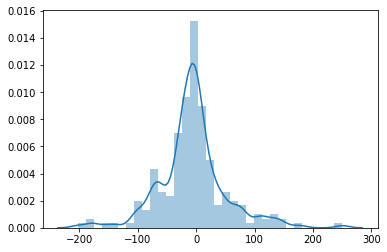

In [105]:
import matplotlib.pyplot as plt
import seaborn
residulas=y_test.values.reshape(-1,1)-prediction
sns.distplot(residulas)

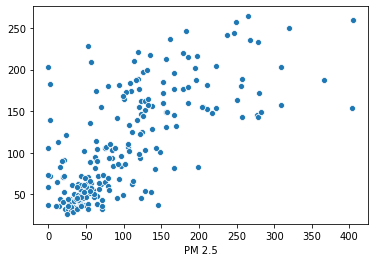

In [106]:
sns.scatterplot(y_test,prediction.reshape(-1))

In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [124]:
model=Sequential()
model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(units=256,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=256,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

result=model.fit(x_train, y_train.values,validation_split=0.33,batch_size=10,epochs=100)


Train on 342 samples, validate on 169 samples
Epoch 1/100
342/342 [==============================] - 6s 18ms/sample - loss: 99.7299 - mean_absolute_error: 99.7299 - val_loss: 61.0391 - val_mean_absolute_error: 61.0391
Epoch 2/100
342/342 [==============================] - 1s 2ms/sample - loss: 46.9256 - mean_absolute_error: 46.9256 - val_loss: 44.3913 - val_mean_absolute_error: 44.3913
Epoch 3/100
342/342 [==============================] - 1s 1ms/sample - loss: 40.3332 - mean_absolute_error: 40.3332 - val_loss: 42.0340 - val_mean_absolute_error: 42.0340
Epoch 4/100
342/342 [==============================] - 0s 1ms/sample - loss: 36.8267 - mean_absolute_error: 36.8267 - val_loss: 40.5802 - val_mean_absolute_error: 40.5802
Epoch 5/100
342/342 [==============================] - 0s 1ms/sample - loss: 35.6316 - mean_absolute_error: 35.6316 - val_loss: 39.1606 - val_mean_absolute_error: 39.1606
Epoch 6/100
342/342 [==============================] - 0s 1ms/sample - loss: 34.4648 - mean_absolu

342/342 [==============================] - 0s 547us/sample - loss: 26.5655 - mean_absolute_error: 26.5655 - val_loss: 34.7616 - val_mean_absolute_error: 34.7616
Epoch 96/100
342/342 [==============================] - 0s 538us/sample - loss: 26.4795 - mean_absolute_error: 26.4795 - val_loss: 36.2292 - val_mean_absolute_error: 36.2292
Epoch 97/100
342/342 [==============================] - 0s 530us/sample - loss: 27.4072 - mean_absolute_error: 27.4072 - val_loss: 36.6921 - val_mean_absolute_error: 36.6921
Epoch 98/100
342/342 [==============================] - 0s 546us/sample - loss: 25.9715 - mean_absolute_error: 25.9715 - val_loss: 39.1012 - val_mean_absolute_error: 39.1012
Epoch 99/100
342/342 [==============================] - 0s 562us/sample - loss: 25.7235 - mean_absolute_error: 25.7235 - val_loss: 36.9915 - val_mean_absolute_error: 36.9915
Epoch 100/100
342/342 [==============================] - 0s 530us/sample - loss: 26.5185 - mean_absolute_error: 26.5185 - val_loss: 36.1856 - v

In [133]:
def  metrics(x_train,y_train,x_test,y_test):
    pred=model.predict(x_test)
    print('MAE---',mean_absolute_error(y_test,pred))
    print('MSE---',mean_squared_error(y_test,pred))
    print('R2---',r2_score(y_test,pred))
    train_mae=model.evaluate(x_train,y_train.values)
    test_mae=model.evaluate(x_test,y_test.values)

    print('train_mse',train_mae)
    print('test_mse',test_mae)

In [134]:
metrics(x_train,y_train,x_test,y_test)

MAE--- 32.38697947468751
MSE--- 2330.212810241612
R2--- 0.6430517926192403
511/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

219/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# DIfferent WEIGHT Initialization

In [145]:
model=Sequential()
model.add(Dense(128, kernel_initializer='he_uniform',input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(units=256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

result=model.fit(x_train, y_train.values,validation_split=0.33,batch_size=10,epochs=100)

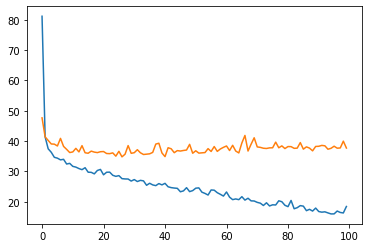

In [142]:
##metrics(x_train,y_train,x_test,y_test)
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [146]:
model=Sequential()
model.add(Dense(128, kernel_initializer='glorot_uniform',input_dim = x_train.shape[1], activation='relu'))
model.add(Dense(units=256,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(units=256,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

result=model.fit(x_train, y_train.values,validation_split=0.33,batch_size=10,epochs=100)

Train on 342 samples, validate on 169 samples
Epoch 1/100
342/342 [==============================] - 3s 9ms/sample - loss: 99.9523 - mean_absolute_error: 99.9523 - val_loss: 61.4500 - val_mean_absolute_error: 61.4500
Epoch 2/100
342/342 [==============================] - 0s 1ms/sample - loss: 47.0676 - mean_absolute_error: 47.0676 - val_loss: 47.2299 - val_mean_absolute_error: 47.2299
Epoch 3/100
342/342 [==============================] - 0s 1ms/sample - loss: 40.1689 - mean_absolute_error: 40.1689 - val_loss: 43.5714 - val_mean_absolute_error: 43.5714
Epoch 4/100
342/342 [==============================] - 0s 1ms/sample - loss: 38.3461 - mean_absolute_error: 38.3461 - val_loss: 40.4759 - val_mean_absolute_error: 40.4759
Epoch 5/100
342/342 [==============================] - 0s 1ms/sample - loss: 35.8633 - mean_absolute_error: 35.8633 - val_loss: 39.0359 - val_mean_absolute_error: 39.0359
Epoch 6/100
342/342 [==============================] - 0s 1ms/sample - loss: 35.0182 - mean_absolut

342/342 [==============================] - 0s 573us/sample - loss: 24.0965 - mean_absolute_error: 24.0965 - val_loss: 36.2552 - val_mean_absolute_error: 36.2552
Epoch 96/100
342/342 [==============================] - 0s 562us/sample - loss: 23.7084 - mean_absolute_error: 23.7084 - val_loss: 41.4712 - val_mean_absolute_error: 41.4712
Epoch 97/100
342/342 [==============================] - 0s 563us/sample - loss: 24.8206 - mean_absolute_error: 24.8206 - val_loss: 35.7649 - val_mean_absolute_error: 35.7649
Epoch 98/100
342/342 [==============================] - 0s 541us/sample - loss: 23.1899 - mean_absolute_error: 23.1899 - val_loss: 37.3371 - val_mean_absolute_error: 37.3371
Epoch 99/100
342/342 [==============================] - 0s 546us/sample - loss: 24.5166 - mean_absolute_error: 24.5166 - val_loss: 37.5110 - val_mean_absolute_error: 37.5110
Epoch 100/100
342/342 [==============================] - 0s 594us/sample - loss: 23.6182 - mean_absolute_error: 23.6182 - val_loss: 37.1768 - v

MAE--- 33.25729989149073
MSE--- 2344.8528341421834
R2--- 0.6408091947481993
511/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

219/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

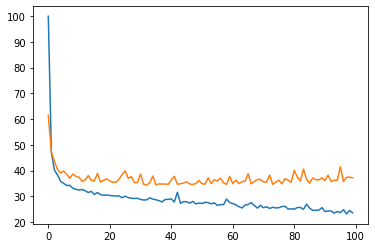

In [147]:
metrics(x_train,y_train,x_test,y_test)
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])